# Visualization Techniques

This notebook provides visualizations to gain insights from classification and regression results.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import statsmodels.api as sm

# Set the style for seaborn
sns.set(style='whitegrid')


## 1. Confusion Matrix for Classification Results

Let's use the Iris dataset as an example to visualize the confusion matrix.

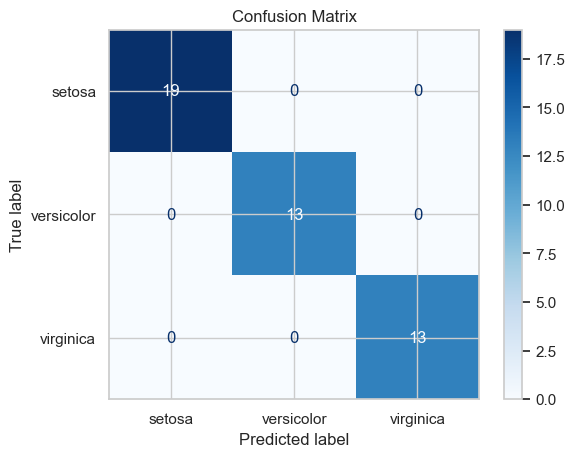

In [3]:
# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 2. ROC Curve for Model Performance

We will calculate the ROC curve for the multi-class classification.

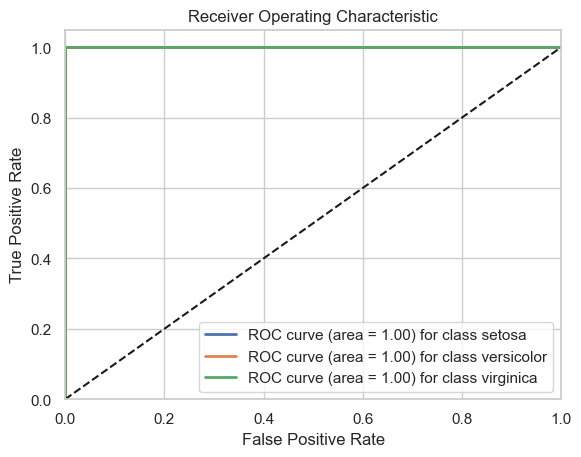

In [4]:
# Calculate ROC curve
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(data.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(len(data.target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], data.target_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 3. Feature Importance Plots

Understanding which features contribute most to the model.

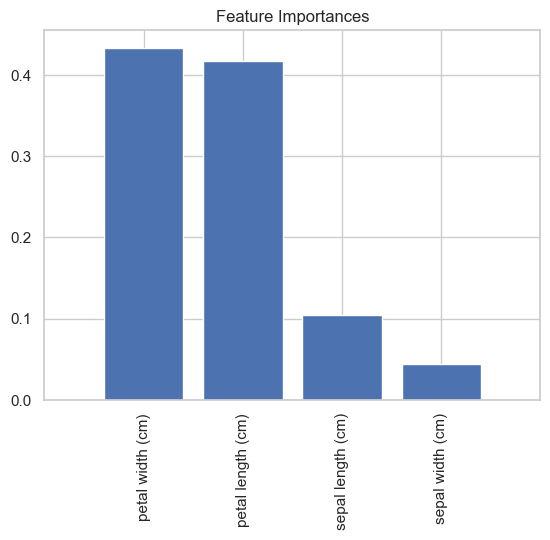

In [5]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 4. Residual Plots for Regression Analysis

We'll use a simple linear regression model for demonstration.

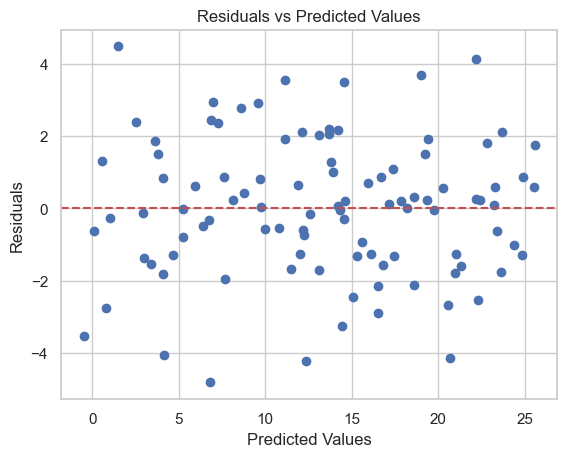

In [6]:
# Generate synthetic regression data
X_reg = np.random.rand(100, 1) * 10
y_reg = 2.5 * X_reg.flatten() + np.random.randn(100) * 2

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_reg, y_reg)

# Predictions
y_pred_reg = model.predict(X_reg)

# Calculate residuals
residuals = y_reg - y_pred_reg

# Residual plot
plt.figure()
plt.scatter(y_pred_reg, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# Generate synthetic regression data
X_reg = np.random.rand(100, 1) * 10
X_reg = np.random.rand(100, 1) * 10: This line generates synthetic feature data for regression. np.random.rand(100, 1) creates an array of 100 random numbers uniformly distributed between 0 and 1, shaped as a column vector (100 rows, 1 column). Multiplying by 10 scales these values to be between 0 and 10.

y_reg = 2.5 * X_reg.flatten() + np.random.randn(100) * 2
y_reg = 2.5 * X_reg.flatten() + np.random.randn(100) * 2: This line generates the target variable y_reg for the regression. It takes the flattened version of X_reg (turning it into a 1D array) and multiplies it by 2.5, creating a linear relationship. Then, np.random.randn(100) * 2 adds normally distributed random noise (mean = 0, standard deviation = 2) to the linear function to simulate real-world data variability.

# Train a Linear Regression model
model = LinearRegression()
model = LinearRegression(): This line initializes a linear regression model using the LinearRegression class from scikit-learn.

model.fit(X_reg, y_reg)
model.fit(X_reg, y_reg): This line trains the linear regression model using the synthetic data. The model learns the relationship between the feature X_reg and the target variable y_reg.

# Predictions
y_pred_reg = model.predict(X_reg)
y_pred_reg = model.predict(X_reg): This line uses the trained model to make predictions on the same feature data (X_reg). The predicted values are stored in y_pred_reg.

# Calculate residuals
residuals = y_reg - y_pred_reg
residuals = y_reg - y_pred_reg: This line calculates the residuals, which are the differences between the actual target values (y_reg) and the predicted values (y_pred_reg). Residuals represent the errors in the predictions.

# Residual plot
plt.figure()
plt.figure(): This creates a new figure for the residual plot.

plt.scatter(y_pred_reg, residuals)
plt.scatter(y_pred_reg, residuals): This line creates a scatter plot of the predicted values (y_pred_reg) on the x-axis against the residuals on the y-axis. This plot helps visualize how the residuals behave with respect to the predicted values.

plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--'): This line adds a horizontal dashed red line at y=0 on the plot. This line serves as a reference to indicate where the residuals would be zero (i.e., where predictions perfectly match actual values).

plt.xlabel('Predicted Values')
plt.xlabel('Predicted Values'): This sets the label for the x-axis of the plot, indicating that it represents the predicted values from the model.

plt.ylabel('Residuals')
plt.ylabel('Residuals'): This sets the label for the y-axis, indicating that it represents the residuals (errors).

plt.title('Residuals vs Predicted Values')
plt.title('Residuals vs Predicted Values'): This sets the title of the plot, summarizing what the plot represents.

plt.show()
plt.show(): This line displays the figure with the residual plot, rendering it in the notebook.

## 5. Histograms or Box Plots for Feature Distributions

Visualizing the distribution of features.

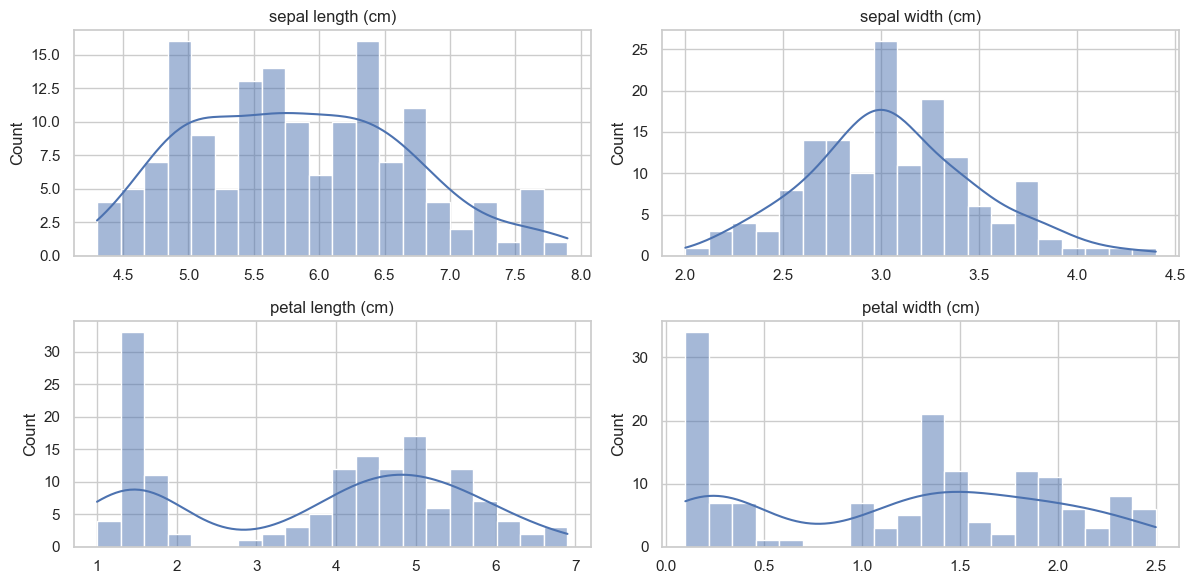

In [14]:
# Histograms
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[:, i], bins=20, kde=True)
    plt.title(data.feature_names[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6)): This line creates a new figure for the plots. The figsize argument specifies the size of the figure in inches (width, height). In this case, the figure is 12 inches wide and 6 inches tall.


for i in range(X.shape[1]):
for i in range(X.shape[1]): This starts a loop that iterates over the number of features in the dataset X. X.shape[1] returns the number of columns (features) in X.


    plt.subplot(2, 2, i + 1)
plt.subplot(2, 2, i + 1): This creates a grid of subplots. The grid is defined to have 2 rows and 2 columns (2, 2), and i + 1 specifies the current subplot (the indexing starts at 1). So, for the first feature, it uses the first subplot, and so on.



    sns.histplot(X[:, i], bins=20, kde=True)
sns.histplot(X[:, i], bins=20, kde=True): This line generates a histogram for the i-th feature. X[:, i] selects all rows for the i-th column (feature) in X. bins=20 specifies the number of bins to use for the histogram, and kde=True overlays a Kernel Density Estimate (KDE) line on the histogram to show the distribution's shape.



    plt.title(data.feature_names[i])
plt.title(data.feature_names[i]): This sets the title for the current subplot. data.feature_names[i] accesses the name of the i-th feature from the dataset, which is used to label the histogram appropriately.



plt.tight_layout()
plt.tight_layout(): This adjusts the spacing between the subplots automatically to prevent overlap and ensure everything fits well within the figure.



plt.show()
plt.show(): This line displays the figure with all the histograms. It's the final step that renders the visual output in the notebook.